<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/Midterm/Midterm_read_data_Lan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install sodapy

In [ ]:
import geopandas as gpd

In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
from sodapy import Socrata


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
light = gpd.read_file("/content/drive/My Drive/midterm_Lan/Streetlight locations/geo_export_595de76b-f3ad-470c-b7b6-4ca187060af5.shp")
light

,lampa,lampb,lampc,lampd,lampe,lampf,lastplan,postdesc,slid,status,stlid,geometry
0,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198740.0,AsBuilt,SL5552-53,POINT (-118.47789 33.99161)
1,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198741.0,AsBuilt,SL5552-54,POINT (-118.47805 33.99179)
2,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198742.0,AsBuilt,SL5552-55,POINT (-118.47819 33.99195)
3,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198743.0,AsBuilt,SL5552-56,POINT (-118.47832 33.99210)
4,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198744.0,AsBuilt,SL5552-57,POINT (-118.47847 33.99228)
...,...,...,...,...,...,...,...,...,...,...,...,...
217634,107W LED,None,None,None,None,None,P38196,CD953C,237016.0,Energized,P38196-103,POINT (-118.28284 34.00567)
217635,107W LED,None,None,None,None,None,P38196,CD953C,237017.0,Energized,P38196-104,POINT (-118.28258 34.00534)
217636,107W LED,None,None,None,None,None,P38196,Cal Type 19-4-100,237019.0,Energized,P38196-78,POINT (-118.28259 34.00569)
217637,107W LED,None,None,None,None,None,P38196,Cal Type 17-3-100,237018.0,Energized,P38196-69,POINT (-118.28284 34.00531)


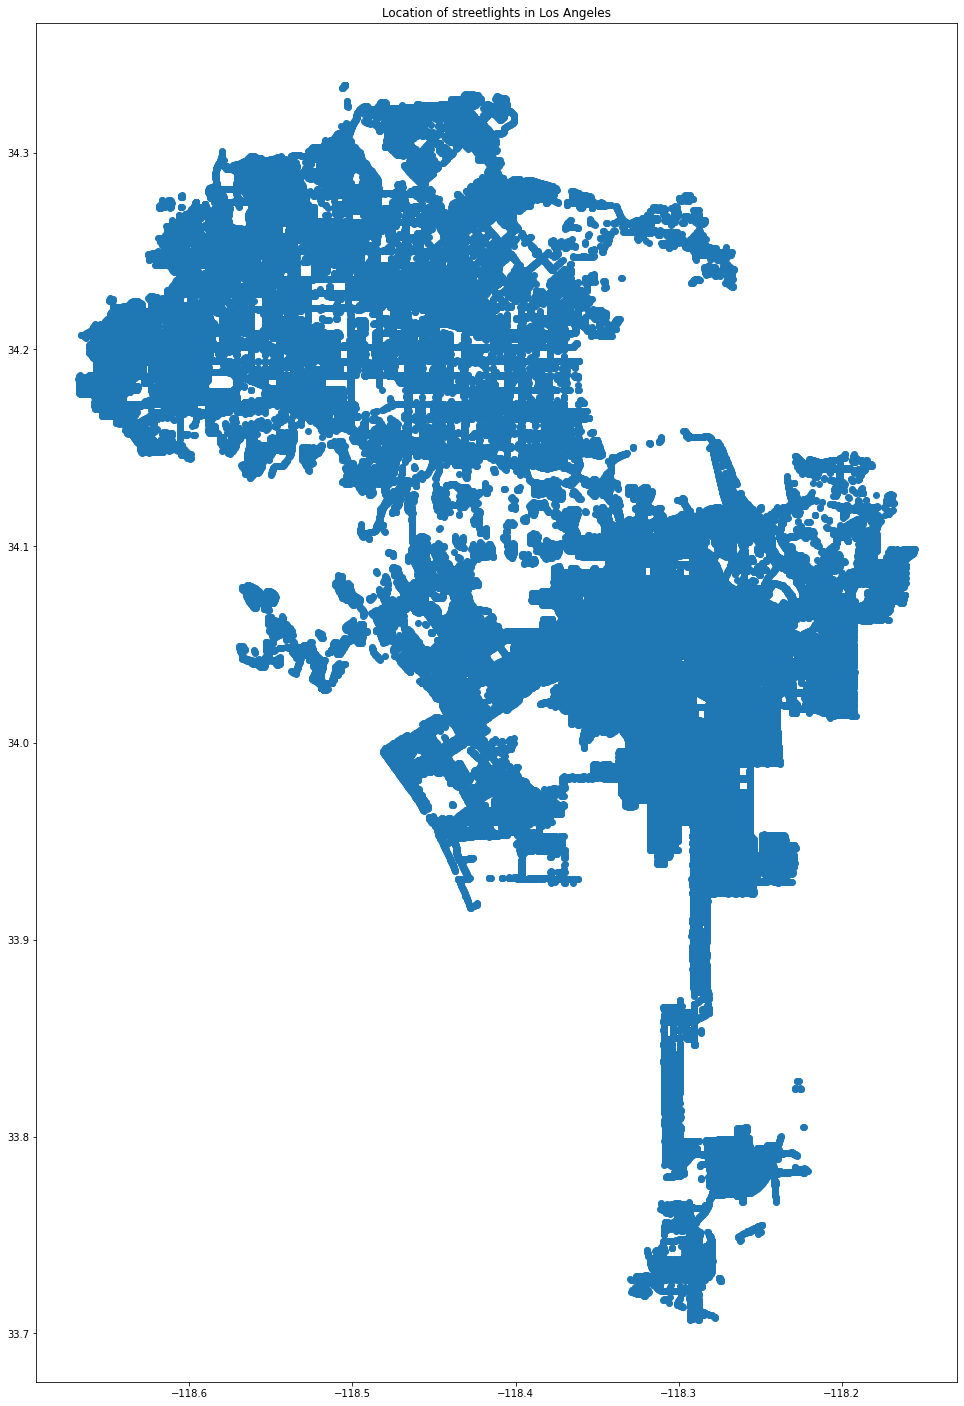

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 25))
light.plot(ax = ax)
plt.title("Location of streetlights in Los Angeles");

In [ ]:
boro = gpd.read_file("https://opendata.arcgis.com/datasets/d6c55385a0e749519f238b77135eafac_0.geojson")
boro["name"].dropna

<bound method Series.dropna of 0             Adams-Normandie
1                      Arleta
2           Arlington Heights
3             Atwater Village
4      Baldwin Hills/Crenshaw
                ...          
109                Wilmington
110            Windsor Square
111                  Winnetka
112            Woodland Hills
113               Lake Balboa
Name: name, Length: 114, dtype: object>

In [ ]:
crime = pd.read_csv("https://data.lacity.org/resource/63jg-8b9z.csv")

In [ ]:
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)



#results = client.get("63jg-8b9z", where = "date_rptd > '2019-01-01T00:00:00.000'"'", limit = 20000 )

results = client.get("63jg-8b9z", where = "'2019-01-01T00:00:00.000'< date_rptd", limit = 300000)
                     

# Convert to pandas DataFrame

crime = pd.DataFrame.from_records(results)

In [ ]:
crime2019 = crime[crime["date_rptd"] < '2020-01-01T00:00:00.000']

In [ ]:
crime2019

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,cross_street,crm_cd_2,crm_cd_3,crm_cd_4
0,190504082,2019-01-02T00:00:00.000,2019-01-02T00:00:00.000,2117,05,Harbor,0529,2,624,BATTERY - SIMPLE ASSAULT,0202 0416 1218 1313 0913,24,F,H,102,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,500 BROAD AV,33.7757,-118.2608,NaN,NaN,NaN,NaN
1,191204522,2019-01-02T00:00:00.000,2019-01-02T00:00:00.000,1930,12,77th Street,1283,1,251,SHOTS FIRED AT INHABITED DWELLING,0450 0906,18,F,B,501,SINGLE FAMILY DWELLING,106,UNKNOWN FIREARM,IC,Invest Cont,251,9500 S WESTERN AV,33.9499,-118.309,NaN,NaN,NaN,NaN
2,191704177,2019-01-02T00:00:00.000,2019-01-02T00:00:00.000,1400,17,Devonshire,1764,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1218 0416,30,M,W,108,PARKING LOT,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230,NORDHOFF ST,34.2355,-118.5536,TAMPA AV,NaN,NaN,NaN
3,190104135,2019-01-02T00:00:00.000,2019-01-02T00:00:00.000,1800,01,Central,0143,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,20,M,H,203,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,440,400 S BROADWAY,34.0495,-118.2494,NaN,NaN,NaN,NaN
4,190504045,2019-01-02T00:00:00.000,2019-01-02T00:00:00.000,0100,05,Harbor,0581,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1202 1606 1300 0344,77,M,W,101,STREET,NaN,NaN,IC,Invest Cont,420,2500 GRAYSBY AV,33.7245,-118.3175,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220024,191522731,2019-12-31T00:00:00.000,2019-12-03T00:00:00.000,0800,15,N Hollywood,1545,2,354,THEFT OF IDENTITY,0377,57,F,O,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354,5000 COLFAX AV,34.1649,-118.3921,NaN,NaN,NaN,NaN
220025,200704002,2019-12-31T00:00:00.000,2018-03-03T00:00:00.000,1900,07,Wilshire,0724,1,330,BURGLARY FROM VEHICLE,1609 0344,43,F,K,108,PARKING LOT,NaN,NaN,IC,Invest Cont,330,100 THE GROVE DR,34.0761,-118.3563,NaN,NaN,NaN,NaN
220026,200304018,2019-12-31T00:00:00.000,2016-07-01T00:00:00.000,0001,03,Southwest,0393,1,121,"RAPE, FORCIBLE",0413 1206 1218 0500,23,F,B,501,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121,3100 W 43RD PL,34.0044,-118.3267,NaN,NaN,NaN,NaN
220027,191522730,2019-12-31T00:00:00.000,2015-12-30T00:00:00.000,1200,15,N Hollywood,1546,2,354,THEFT OF IDENTITY,0377,14,F,W,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354,11600 CHANDLER BL,34.1684,-118.3851,NaN,NaN,NaN,NaN


In [ ]:
crime2019["lat"].dropna

<bound method Series.dropna of 0         33.7757
1         33.9499
2         34.2355
3         34.0495
4         33.7245
           ...   
220024    34.1649
220025    34.0761
220026    34.0044
220027    34.1684
220028    34.2758
Name: lat, Length: 220029, dtype: object>

In [ ]:
demo = gpd.read_file("https://opendata.arcgis.com/datasets/2f11013d1302419aac243d6e1c56568f_0.geojson")

In [ ]:
demo["bdensity"] = demo["black"]/demo["tot_pop"]

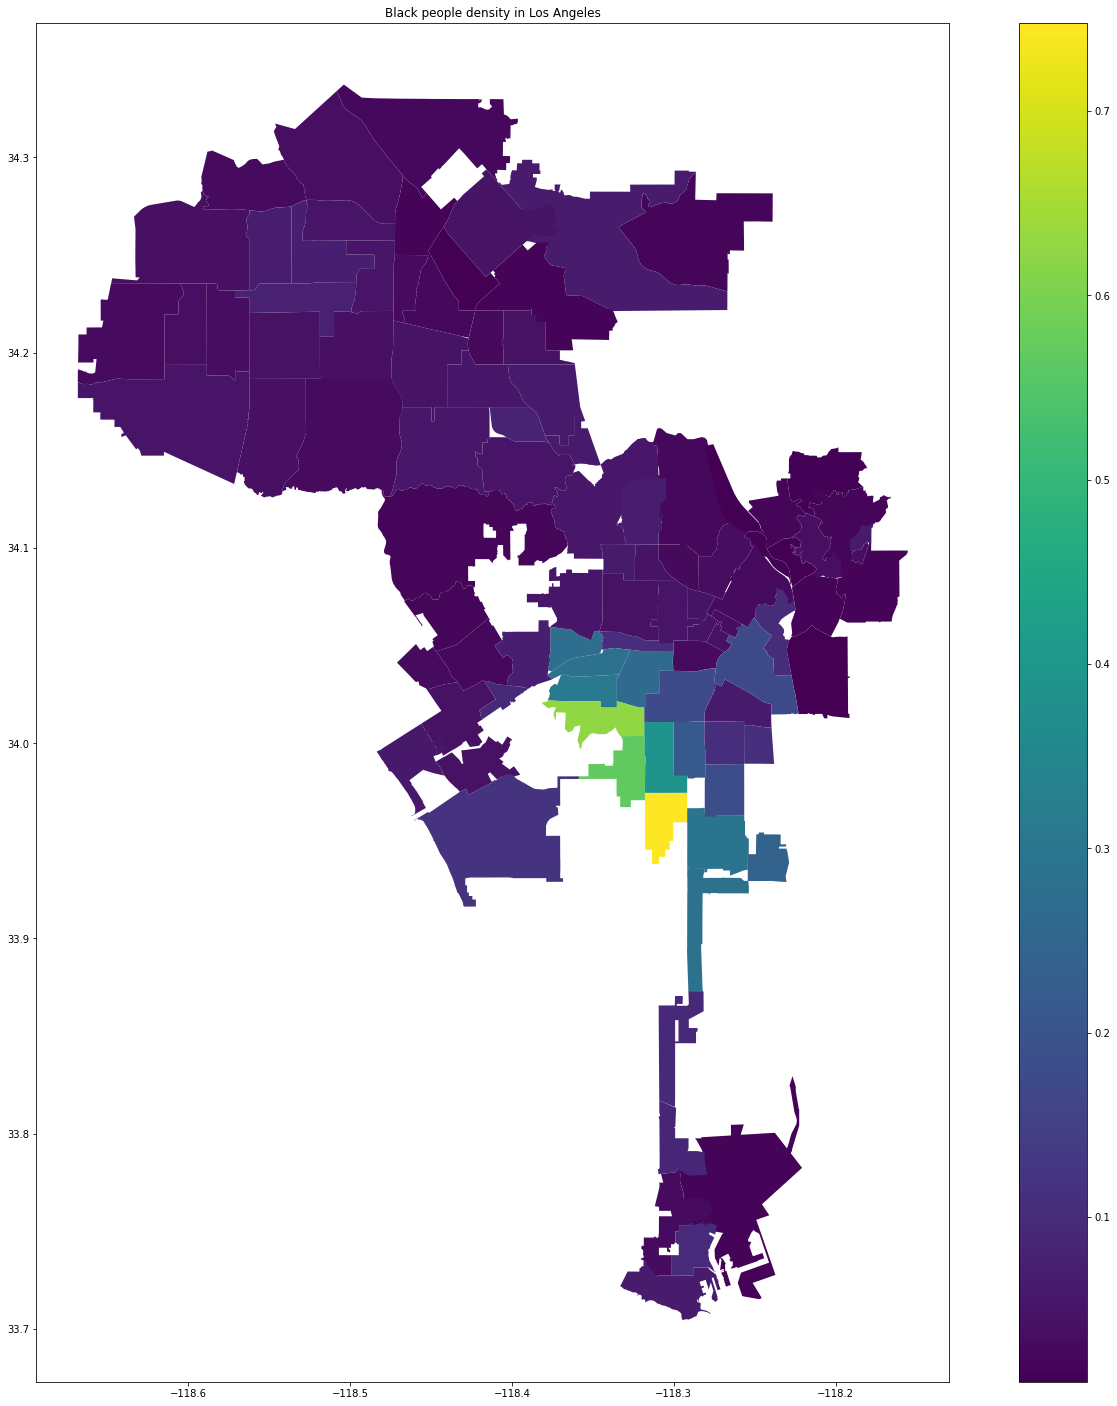

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 25))
demo.plot("bdensity", ax = ax, legend = True)
plt.title("Black people density in Los Angeles");